In [4]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Montar Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [28]:
archivo_path = '/content/drive/MyDrive/Primer Entrega/solicitudes - solicitudes.csv'

# Cargar el dataset
df = pd.read_csv(archivo_path)

# Ver las primeras filas del DataFrame
print(df.head())

  Identificador                Market Fecha Necesidad Tipo de Activación  \
0      caf670df     UY_13_Tres Cruces       21/4/2024           Staffing   
1      2c9a7b75  UY_10_Carrasco Norte       22/4/2024           Staffing   
2      2a12c787  UY_10_Carrasco Norte       22/4/2024           Staffing   
3      bf9267d0     UY_8_Malvin Norte       22/4/2024           Staffing   
4      ca45caf1           UY_7_Sayago       22/4/2024           Staffing   

  Horario Inicio Horario Fin                      Level 1 Level 2 Level 3  \
0          18:00        0:00                      GRACIAS     NaN     NaN   
1          17:00       22:00                            .     NaN     NaN   
2          18:00       23:00                            .     NaN     NaN   
3          16:00        0:00                          NaN     NaN     NaN   
4          17:00        0:00  por falta de último momento     NaN     NaN   

    Status Justificación Asistio?  
0  Enviado             -     True  
1  Envia

In [27]:
# Reemplazar los valores nulos con un valor específico
df = df.fillna("SIN DATOS")  # Reemplaza los nulos por SIN DATOS

# Ver las primeras filas del DataFrame después de reemplazar los nulos
print(df.head())


  Identificador                Market Fecha Necesidad Tipo de Activación  \
0      caf670df     UY_13_Tres Cruces       21/4/2024           Staffing   
1      2c9a7b75  UY_10_Carrasco Norte       22/4/2024           Staffing   
2      2a12c787  UY_10_Carrasco Norte       22/4/2024           Staffing   
3      bf9267d0     UY_8_Malvin Norte       22/4/2024           Staffing   
4      ca45caf1           UY_7_Sayago       22/4/2024           Staffing   

  Horario Inicio Horario Fin                      Level 1    Level 2  \
0          18:00        0:00                      GRACIAS  SIN DATOS   
1          17:00       22:00                            .  SIN DATOS   
2          18:00       23:00                            .  SIN DATOS   
3          16:00        0:00                    SIN DATOS  SIN DATOS   
4          17:00        0:00  por falta de último momento  SIN DATOS   

     Level 3   Status Justificación Asistio?  
0  SIN DATOS  Enviado             -     True  
1  SIN DATOS  En

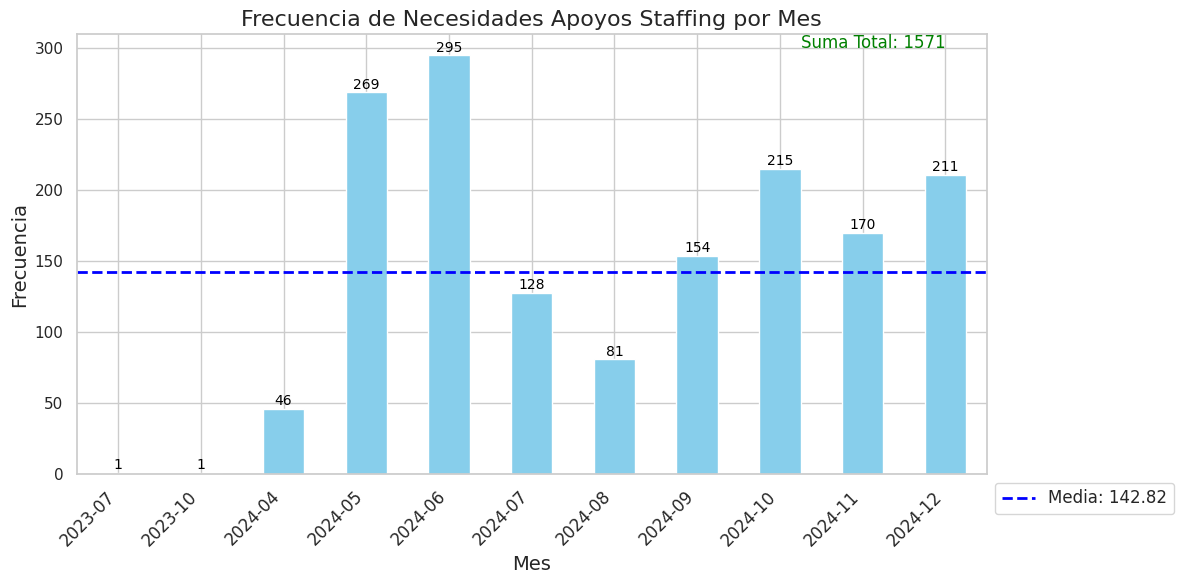

In [40]:
# Agrupar las solicitudes por mes
necesidad_por_mes = df.groupby(df['Fecha Necesidad'].dt.to_period('M')).size()

# Crear la figura y el eje
plt.figure(figsize=(12, 6))
ax = necesidad_por_mes.plot(kind='bar', color='skyblue')

# Calcular la media
media = necesidad_por_mes.mean()

# Calcular la suma total
suma_total = necesidad_por_mes.sum()

# Trazar una línea en la media
plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

# Títulos y etiquetas
plt.title('Frecuencia de Necesidades Apoyos Staffing por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar las etiquetas del eje X
ax.set_xticklabels(necesidad_por_mes.index.astype(str), rotation=45, ha='right', fontsize=12)

# Agregar etiquetas con la cantidad de solicitudes encima de las barras
for i, valor in enumerate(necesidad_por_mes.values):
    ax.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10, color='black')

# Agregar la suma total en un lugar visible
plt.text(len(necesidad_por_mes)-1, max(necesidad_por_mes.values) + 2, f'Suma Total: {suma_total}',
         ha='right', va='bottom', fontsize=12, color='green')

# Configurar las leyendas
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)  # Leyenda para la media
plt.legend(loc='upper left', bbox_to_anchor=(1, 0), fontsize=12)  # Leyenda para la suma total

# Mostrar la gráfica
plt.tight_layout()
plt.show()


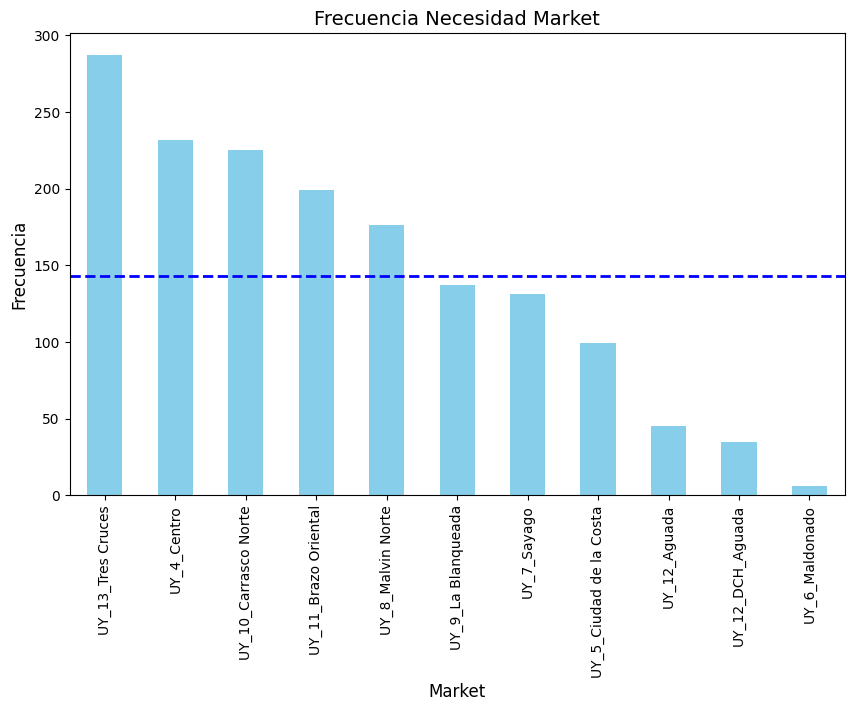

In [44]:
markets_counts = df['Market'].value_counts()

plt.figure(figsize=(10, 6))  # Tamaño de la figura
markets_counts.plot(kind='bar', color='skyblue')


# Calcular la media
media = markets_counts.mean()

# Trazar una línea en la media
plt.axhline(media, color='blue', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

# Títulos y etiquetas
plt.title('Frecuencia Necesidad Market', fontsize=14)
plt.xlabel('Market', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar la gráfica
plt.show()

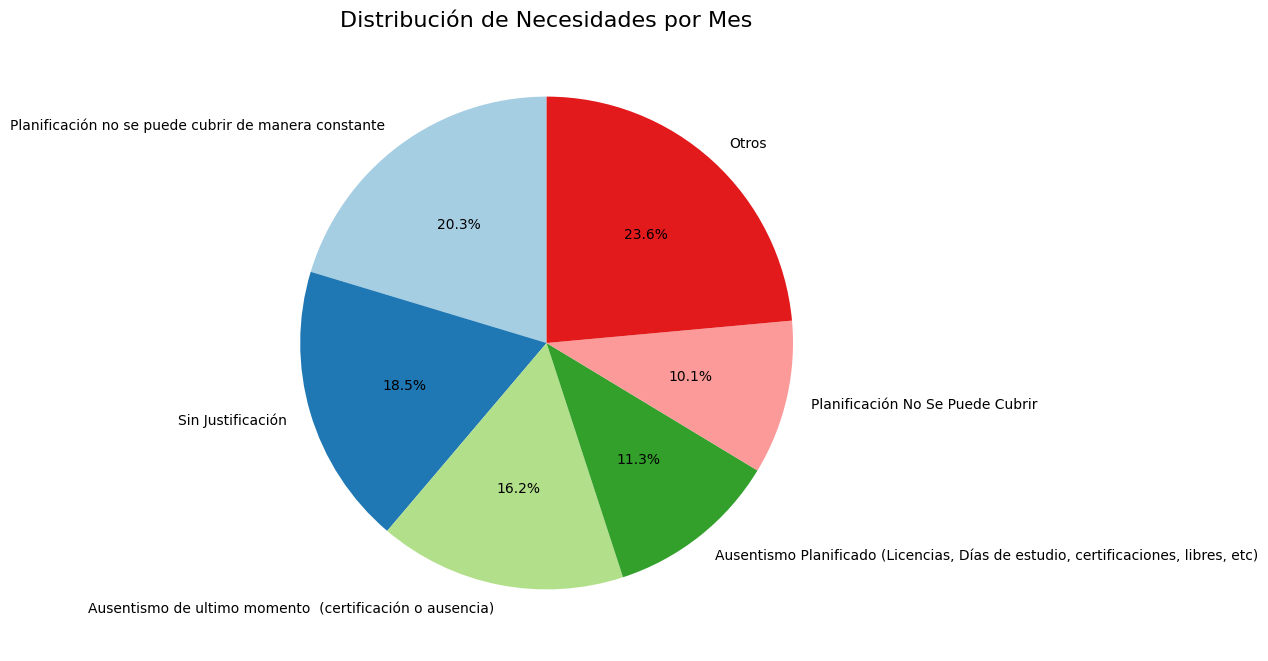

In [32]:
# Reemplazar 'Enviado' por 'Sin Justificación - Registros Viejos' en la columna 'Level 1'
df['Level 1'] = df['Level 1'].replace('Enviado', 'Sin Justificación - Registros Viejos')

# Obtener el conteo de valores en la columna 'Level 1'
level1_counts = df['Level 1'].value_counts()

# Calcular el porcentaje de cada categoría
total = level1_counts.sum()
percentages = (level1_counts / total) * 100

# Reemplazar categorías con porcentaje menor al 10% por 'Otros'
level1_counts_revised = level1_counts.copy()  # Crear una copia para evitar alterar los datos originales
small_categories = percentages[percentages < 10].index  # Identificar categorías menores al 10%
level1_counts_revised.loc['Otros'] = level1_counts_revised[small_categories].sum()  # Sumar las categorías menores al 10%
level1_counts_revised = level1_counts_revised.drop(small_categories)  # Eliminar las categorías menores al 10%

# Crear el gráfico de torta con los datos ajustados
plt.figure(figsize=(8, 8))
level1_counts_revised.plot.pie(
    autopct='%1.1f%%',  # Mostrar porcentajes con 1 decimal
    startangle=90,      # Comenzar desde la parte superior del círculo
    colors=plt.cm.Paired.colors,  # Colores predefinidos
    legend=False        # No mostrar leyenda automática
)

# Títulos del gráfico
plt.title('Distribución de Necesidades por Mes', fontsize=16)
plt.ylabel('')  # Eliminar la etiqueta del eje Y

# Mostrar el gráfico
plt.show()



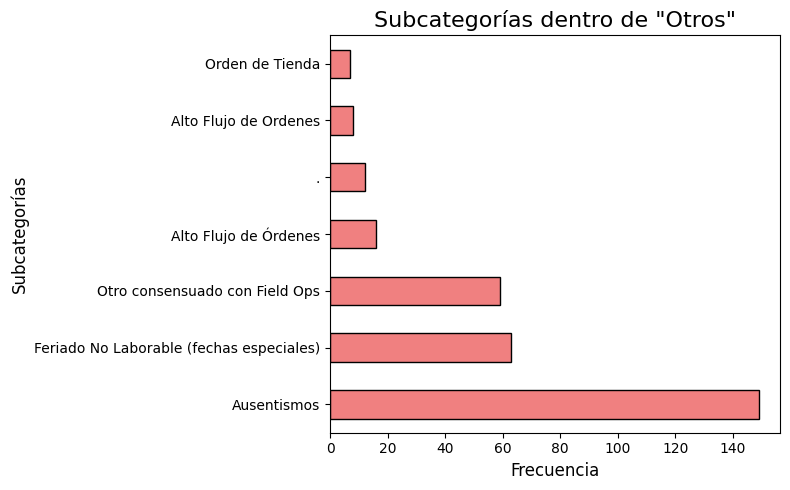

In [36]:
# Filtrar las subcategorías que forman parte de 'Otros'
subcategorias_otros = level1_counts[small_categories]
subcategorias_otros_filtradas = subcategorias_otros[subcategorias_otros > 5]

# Crear un gráfico de barras horizontales
plt.figure(figsize=(8, 5))
subcategorias_otros_filtradas.plot.barh(
    color='lightcoral',  # Color de las barras
    edgecolor='black'    # Bordes para mayor visibilidad
)

# Títulos y etiquetas
plt.title('Subcategorías dentro de "Otros"', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Subcategorías', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar solapamientos
plt.show()


<ipython-input-23-6dd13f58e949>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=promedios_por_mes, x='Mes', y='Duración Horas', palette='viridis')


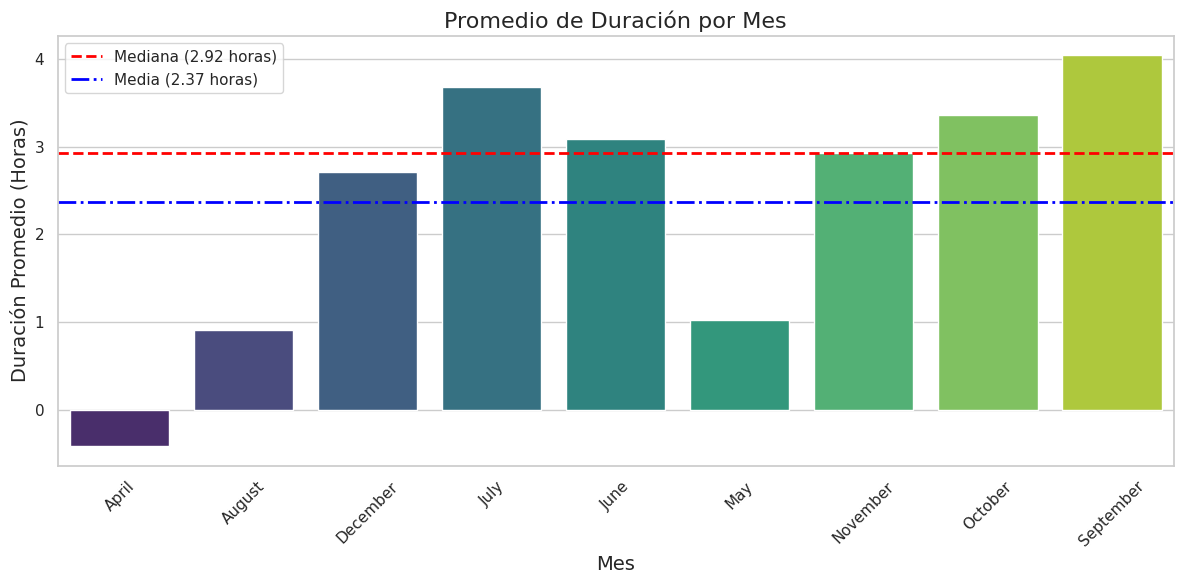

In [23]:


# Calcular la mediana y la media de los promedios mensuales
mediana = promedios_por_mes['Duración Horas'].median()
media = promedios_por_mes['Duración Horas'].mean()

# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para los promedios por mes
sns.barplot(data=promedios_por_mes, x='Mes', y='Duración Horas', palette='viridis')

# Agregar una línea horizontal para la mediana
plt.axhline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana ({mediana:.2f} horas)')

# Agregar una línea horizontal para la media
plt.axhline(media, color='blue', linestyle='-.', linewidth=2, label=f'Media ({media:.2f} horas)')

# Agregar etiquetas y título
plt.title('Promedio de Duración por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Duración Promedio (Horas)', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas de los meses
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

